In [1]:
student_table = {
    '1':12.706,
    '2':4.3027,
    '3':3.1825,
    '4':2.7764,
    '5':2.5706,
    '6':2.4469,
    '7':2.3646,
    '8':2.3060,
    '9':2.2622,
    '10':2.2281,
    '11':2.2010,
    '12':2.1788,
    '13':2.1604,
    '14':2.1448,
    '15':2.1315
}

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x = np.array([98, 73, 87, 86, 110])
y = np.array([158, 152, 162, 146, 173])
y_avg = np.average(y)
x_avg = np.average(x)
X = np.round( np.log10(x),4)
Y = np.round(np.log10(y),4)
Y_avg = np.round(np.average(Y), 4)
X_avg = np.round(np.average(X), 4) 
b = np.round((np.cov(X,Y)[0, 1]/np.cov(X,X)[0, 1]), 1)
C = Y_avg - b*X_avg
a = np.round((10**C), 3)
reg = a * (x ** b)
A = np.round((np.abs((y-reg)/y) * 100) , 2)

data = {
    'x':x,
    'y':y,
    'xy':x*y,
    'x^2':x**2,
    '(x-x_avg)^2': np.round(((x-x_avg)**2), 2),
    '(y-y_avg)^2':  np.round(((y-y_avg)**2), 2),
    'X': X,
    'Y': Y,
    'X*Y': X * Y,
    'X^2': X ** 2,
    'regression' : np.round(reg, 2),
    'y-reg': np.round((y - reg), 2),
    '(y-reg)^2': np.round(((y - reg) ** 2), 2),
    'appr': A    
}
df = pd.DataFrame(data)
sum_row = df.sum()
mean_row = df.mean()

# Создаем DataFrame из новых строк
sum_df = pd.DataFrame(sum_row).T
mean_df = pd.DataFrame(mean_row).T

# Устанавливаем индексы для строк с суммой и средним
sum_df.index = ['Sum']
mean_df.index = ['Mean']

# Присоединяем строки к исходному DataFrame
df = pd.concat([df, sum_df, mean_df])
df = df.round(2)

# Индекс корреляции (ро xy)
corr_ind = np.round((np.sqrt(1 - (df.loc['Sum', '(y-reg)^2']/ 
                                  df.loc['Sum', '(y-y_avg)^2']))), 4)

# Коэфициент эластичности
elast = b

# beta-коэфициент
# beta = b * (sigma_x / sigma_y)
n = len(x)
sigma_x = np.sqrt(df.loc['Sum', '(x-x_avg)^2'] / n)
sigma_y = np.sqrt(df.loc['Sum', '(y-y_avg)^2'] / n)
beta = b * (sigma_x/sigma_y)

# Детерминация 
R = np.round(corr_ind**2, 4)

# F-критерий Фишера
m = 1 # число степеней свободы
F = np.round((R / (1-R)) * ((n- m - 1) / m), 2)

# Остаточная диспресия
S_rem = df.loc['Sum', '(y-reg)^2'] / (n - 2)

# Стандартные ошибки
ma = np.sqrt(S_rem) * (np.sqrt(df.loc['Sum', 'x^2']) / (sigma_x * n))
ta = a / ma

mb = np.sqrt(S_rem) / (sigma_x * np.sqrt(n))
tb = b / mb

mrxy = np.sqrt((1 - R) / (n - 2))
trxy = corr_ind / mrxy

# Доверительный интервал по a и b
# число степеней свободы = n - (кол-во x) - 1 
t_tab = student_table[str(n-1-1)]
da = ma * t_tab
db = mb * t_tab
trust_int_a = (a - da, a + da)
trust_int_b = (b - db, b + db)

# # Прогноз
forecast = 0.891
x_forecast = x_avg * forecast
reg_forecast = a * np.power(x_forecast, b)
mreg_forecast = np.sqrt(S_rem * (1 + (1/n) + (((x_forecast - x_avg)**2)/df.loc['Sum', '(x-x_avg)^2'])))
dreg_forecast = mreg_forecast * t_tab
trust_int_reg_forecast = (reg_forecast - dreg_forecast, reg_forecast + dreg_forecast)

In [4]:
df

,x,y,xy,x^2,(x-x_avg)^2,(y-y_avg)^2,X,Y,X*Y,X^2,regression,y-reg,(y-reg)^2,appr
0,98.0,158.0,15484.0,9604.0,51.84,0.04,1.99,2.20,4.38,3.96,162.06,-4.06,16.45,2.57
1,73.0,152.0,11096.0,5329.0,316.84,38.44,1.86,2.18,4.07,3.47,148.35,3.65,13.31,2.40
2,87.0,162.0,14094.0,7569.0,14.44,14.44,1.94,2.21,4.29,3.76,156.37,5.63,31.70,3.48
3,86.0,146.0,12556.0,7396.0,23.04,148.84,1.93,2.16,4.19,3.74,155.83,-9.83,96.59,6.73
4,110.0,173.0,19030.0,12100.0,368.64,219.04,2.04,2.24,4.57,4.17,167.77,5.23,27.35,3.02
Sum,454.0,791.0,72260.0,41998.0,774.80,420.80,9.77,10.99,21.48,19.11,790.38,0.62,185.40,18.20
Mean,90.8,158.2,14452.0,8399.6,154.96,84.16,1.95,2.20,4.30,3.82,158.08,0.12,37.08,3.64


In [5]:
# 1-я группа 
print(corr_ind)
print(R)
print(elast)
print(beta)

0.7479
0.5594
0.3
0.4070785277518994


In [6]:
# 2-я группа
print(F)
print(S_rem)

3.81
61.800000000000004


In [7]:
# 3-я группа (стандартные ошибки)
print(ma)
print(ta)

print(mb)
print(tb)

print(mrxy)
print(trxy)

25.883841631698886
1.5822226307336584
0.2824225900310292
1.0622379745438904
0.38323187063012737
1.9515600275370328


In [8]:
# 4-я группа (доверительные интервалы)
print(trust_int_a)
print(trust_int_b)

(-41.42132599288171, 123.3293259928817)
(-0.5988098927737504, 1.1988098927737505)


In [9]:
# 5-я группа (прогноз)
print(x_forecast)
print(reg_forecast)
print(mreg_forecast)
print(trust_int_reg_forecast)

80.9028
152.99787246758672
9.053899884233438
(124.1838360860138, 181.81190884915964)


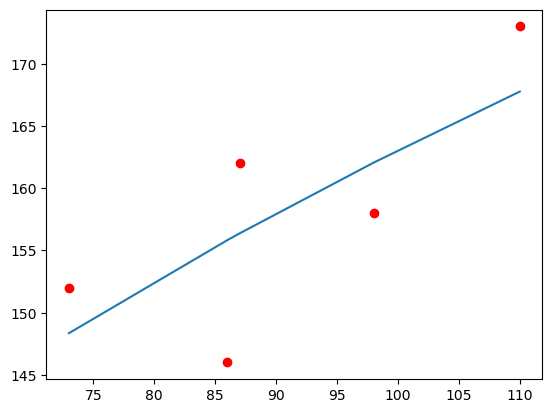

In [11]:
sorted_indexes = np.argsort(x)
x_sorted = x[sorted_indexes]
reg_sorted = reg[sorted_indexes]
plt.plot(x_sorted, reg_sorted)
plt.scatter(x,y, color='red')
plt.show()